In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

import zipfile
!unzip /content/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfgeo = pd.read_csv ('/content/drive/MyDrive/CSE6242/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv')
dfgeo.head(10)
#('/content/drive/MyDrive/CSE6242/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv')

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2022-01,PA,42.0,MONTGOMERY,42091.0,50 to 64 years,Female,Black,Non-Hispanic/Latino,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Unknown,Unknown,Unknown,NaN
1,2020-10,NY,36.0,QUEENS,36081.0,50 to 64 years,Male,Asian,Unknown,0.0,0.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Missing,NaN
2,2021-09,GA,13.0,COBB,13067.0,18 to 49 years,Female,Black,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
3,2021-04,RI,44.0,PROVIDENCE,44007.0,18 to 49 years,Missing,Unknown,NaN,NaN,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,Unknown,NaN
4,2021-09,TN,47.0,SHELBY,47157.0,18 to 49 years,Female,Black,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
5,2021-08,NY,36.0,SUFFOLK,36103.0,50 to 64 years,Male,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
6,2022-01,WA,53.0,PIERCE,53053.0,18 to 49 years,Female,Missing,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Missing,NaN
7,2021-07,WA,53.0,SNOHOMISH,53061.0,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Missing,Yes
8,2020-11,OH,39.0,FRANKLIN,39049.0,18 to 49 years,Male,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
9,2021-11,OH,39.0,HAMILTON,39061.0,18 to 49 years,Female,Black,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [ ]:
dfgeo.describe()

,state_fips_code,county_fips_code,case_positive_specimen_interval,case_onset_interval
count,6.327135e+07,5.900011e+07,2.259550e+07,2.620993e+07
mean,2.585056e+01,2.577553e+04,1.467910e-01,6.661033e-02
std,1.582178e+01,1.582036e+04,1.884986e+00,1.509108e+00
min,1.000000e+00,1.001000e+03,-1.040000e+02,-7.700000e+01
25%,1.200000e+01,1.201100e+04,0.000000e+00,0.000000e+00
50%,2.600000e+01,2.603500e+04,0.000000e+00,0.000000e+00
75%,3.900000e+01,3.903500e+04,0.000000e+00,0.000000e+00
max,7.800000e+01,5.604100e+04,1.060000e+02,1.040000e+02


In [ ]:
cats = [col for col in dfgeo.columns if dfgeo[col].dtypes == "O"]
print(cats)

['case_month', 'res_state', 'res_county', 'age_group', 'sex', 'race', 'ethnicity', 'process', 'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn']


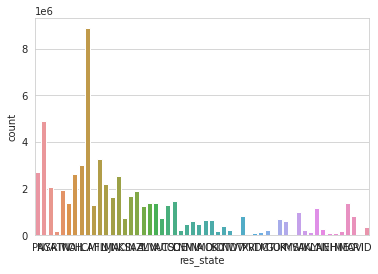

In [ ]:
sns.countplot(dfgeo['res_state']);

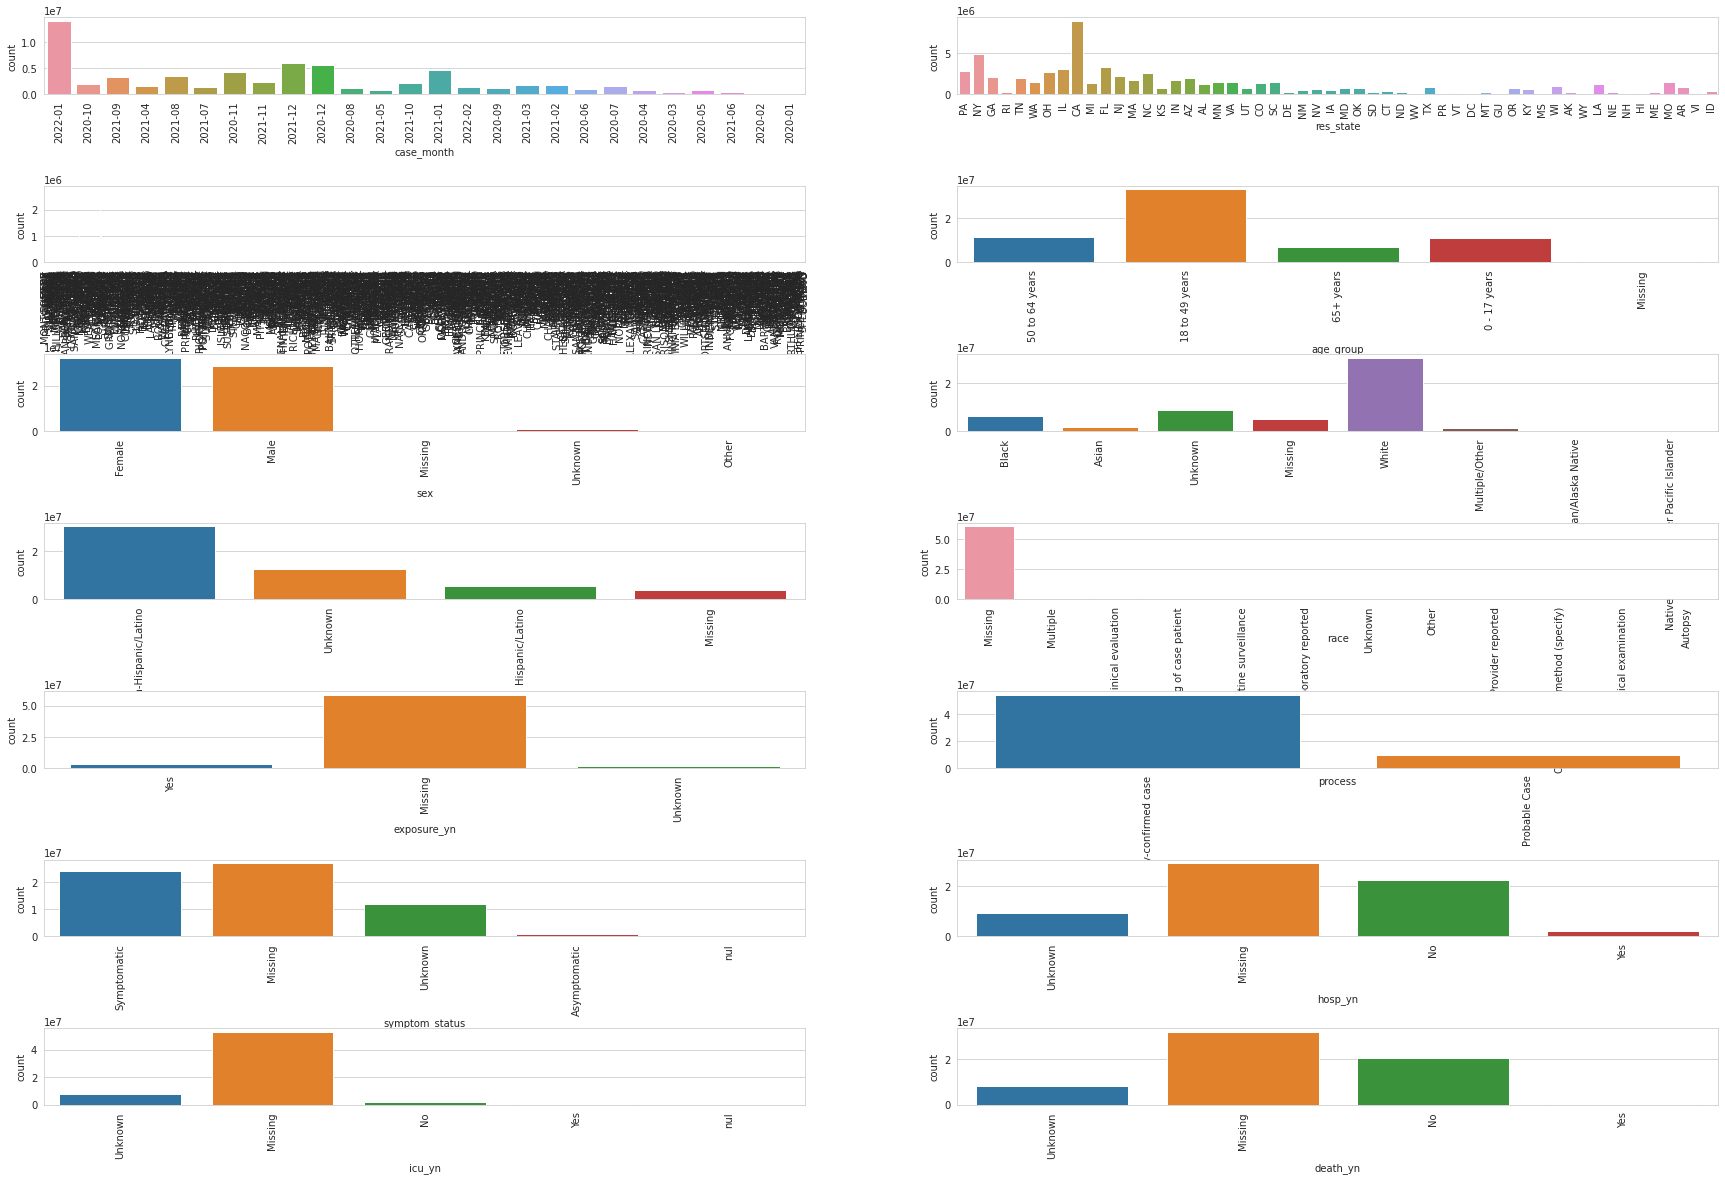

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(30, 20))
plt.subplots_adjust(hspace = 1.2)
for variable, subplot in zip(cats, ax.flatten()):
    sns.countplot(dfgeo[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:

for cat in cats:
    x = dfgeo.groupby([cat]).size().reset_index(name='counts')
    print(x)

   case_month    counts
0     2020-01      4180
1     2020-02      4311
2     2020-03    373291
3     2020-04    786844
4     2020-05    707999
5     2020-06   1000548
6     2020-07   1509498
7     2020-08   1159642
8     2020-09   1117362
9     2020-10   1941173
10    2020-11   4157773
11    2020-12   5505084
12    2021-01   4663803
13    2021-02   1803812
14    2021-03   1802160
15    2021-04   1518055
16    2021-05    834553
17    2021-06    413734
18    2021-07   1331456
19    2021-08   3464905
20    2021-09   3270814
21    2021-10   2162344
22    2021-11   2347392
23    2021-12   5975662
24    2022-01  14019883
25    2022-02   1396081
   res_state   counts
0         AK   225560
1         AL  1253107
2         AR   809602
3         AZ  1921833
4         CA  8867276
5         CO  1300268
6         CT   392953
7         DC   132369
8         DE   248654
9         FL  3277146
10        GA  2051345
11        GU    28173
12        HI   110260
13        IA   503447
14        ID   340058


In [ ]:
dfgeo.groupby(['icu_yn','hosp_yn', 'death_yn']).size().reset_index(name='counts')

,icu_yn,hosp_yn,death_yn,counts
0,Missing,Missing,Missing,21688716
1,Missing,Missing,No,5260475
2,Missing,Missing,Unknown,1701152
3,Missing,Missing,Yes,82704
4,Missing,No,Missing,8025611
...,...,...,...,...
57,nul,Missing,Missing,233
58,nul,Missing,No,186
59,nul,No,No,178
60,nul,Unknown,No,12


In [ ]:
dfgeo_yn  = dfgeo[((dfgeo["icu_yn"] == 'Yes') | (dfgeo["icu_yn"] == 'No')) & ((dfgeo["hosp_yn"] == 'Yes') | (dfgeo["hosp_yn"] == 'No')) \
                                    & ((dfgeo["death_yn"] == 'Yes') | (dfgeo["death_yn"] == 'No'))]

In [ ]:
dfgeo_yn.groupby(['icu_yn','hosp_yn', 'death_yn']).size().reset_index(name='counts')

,icu_yn,hosp_yn,death_yn,counts
0,No,No,No,1356610
1,No,No,Yes,5096
2,No,Yes,No,139443
3,No,Yes,Yes,18147
4,Yes,No,No,1073
5,Yes,No,Yes,80
6,Yes,Yes,No,33087
7,Yes,Yes,Yes,42255


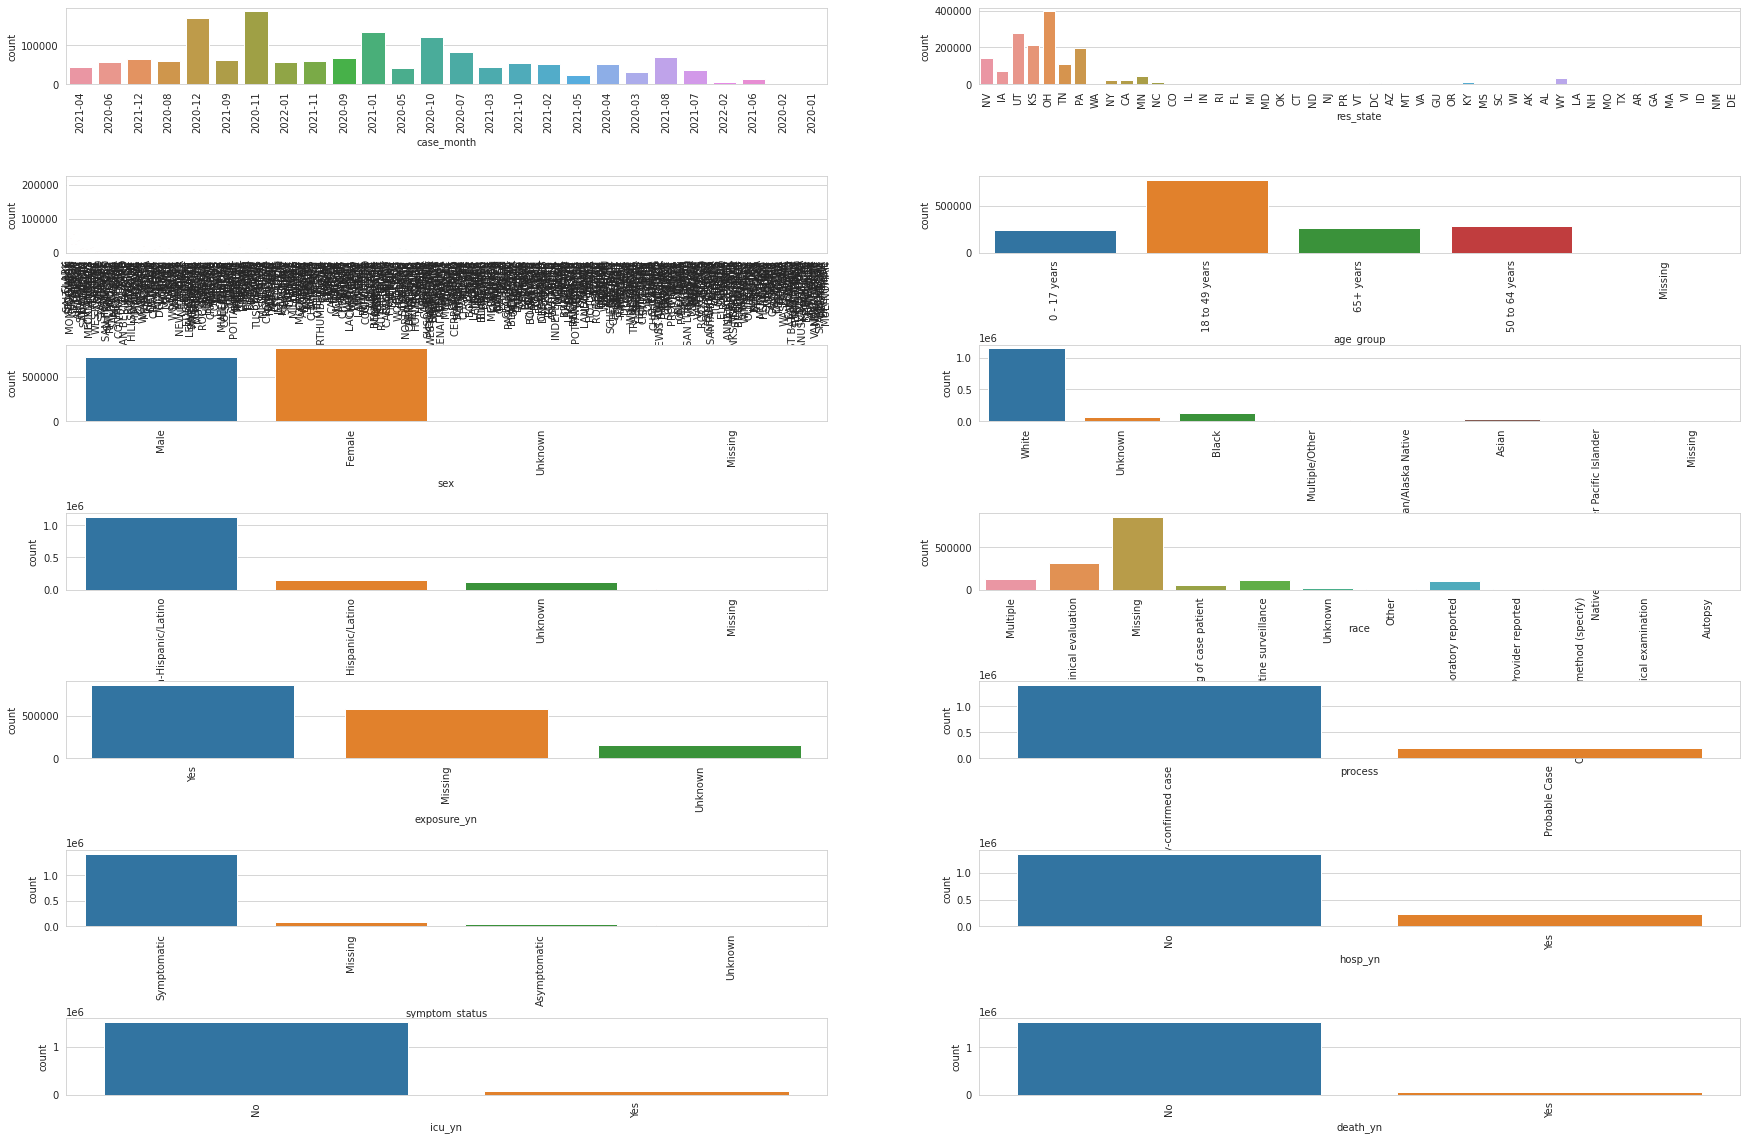

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(30, 20))
plt.subplots_adjust(hspace = 1.2)
for variable, subplot in zip(cats, ax.flatten()):
    sns.countplot(dfgeo_yn[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
dfgeo_yn.groupby(['icu_yn','exposure_yn']).size().reset_index(name='counts')

,icu_yn,exposure_yn,counts
0,No,Missing,525936
1,No,Unknown,147718
2,No,Yes,845642
3,Yes,Missing,57182
4,Yes,Unknown,5012
5,Yes,Yes,14301


Breaking out df_geo to 3:
1.   icu_yn, yes and no only
2.   hosp_yn, yes and no only
3.   death_yn, yes and no only



In [ ]:
df_icu =  dfgeo[((dfgeo["icu_yn"] == 'Yes') | (dfgeo["icu_yn"] == 'No'))]
df_hosp = dfgeo[((dfgeo["hosp_yn"] == 'Yes') | (dfgeo["hosp_yn"] == 'No'))]
df_death = dfgeo[((dfgeo["death_yn"] == 'Yes') | (dfgeo["death_yn"] == 'No'))]

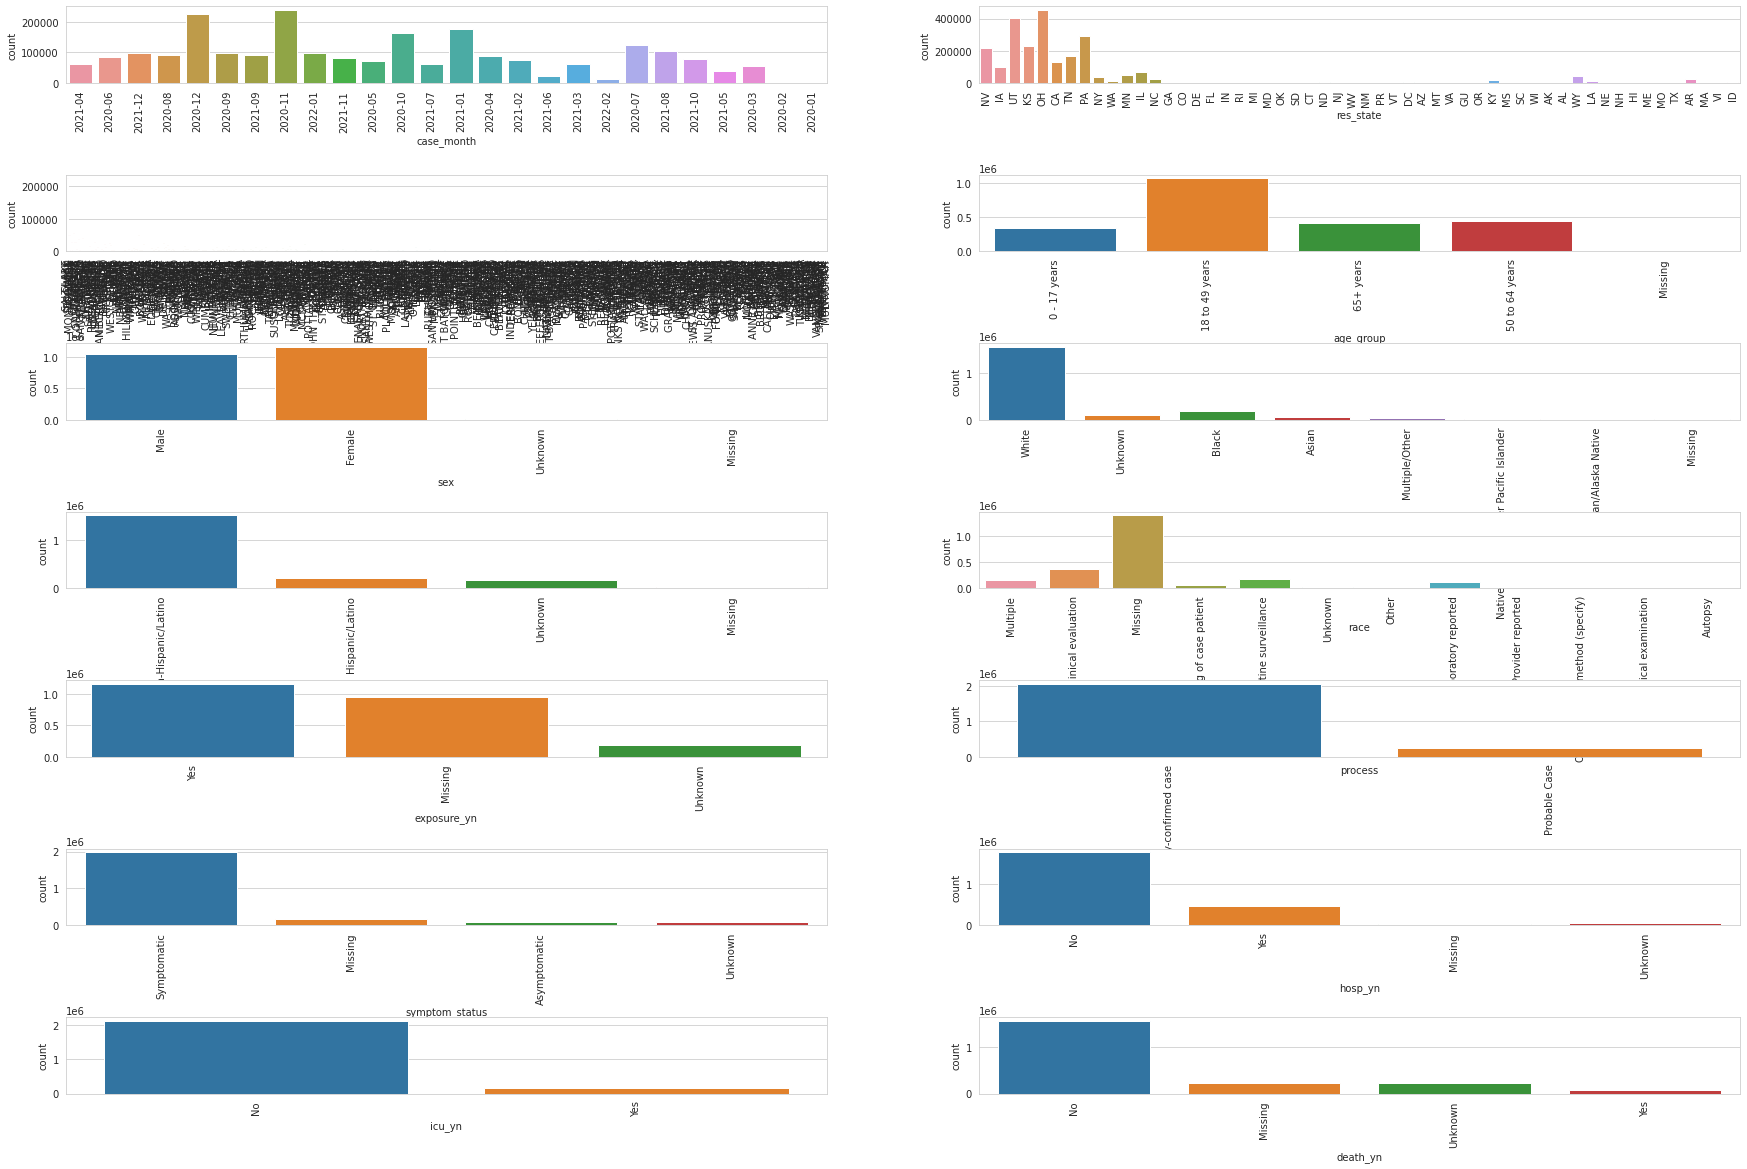

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(30, 20))
plt.subplots_adjust(hspace = 1.2)
for variable, subplot in zip(cats, ax.flatten()):
    sns.countplot(df_icu[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

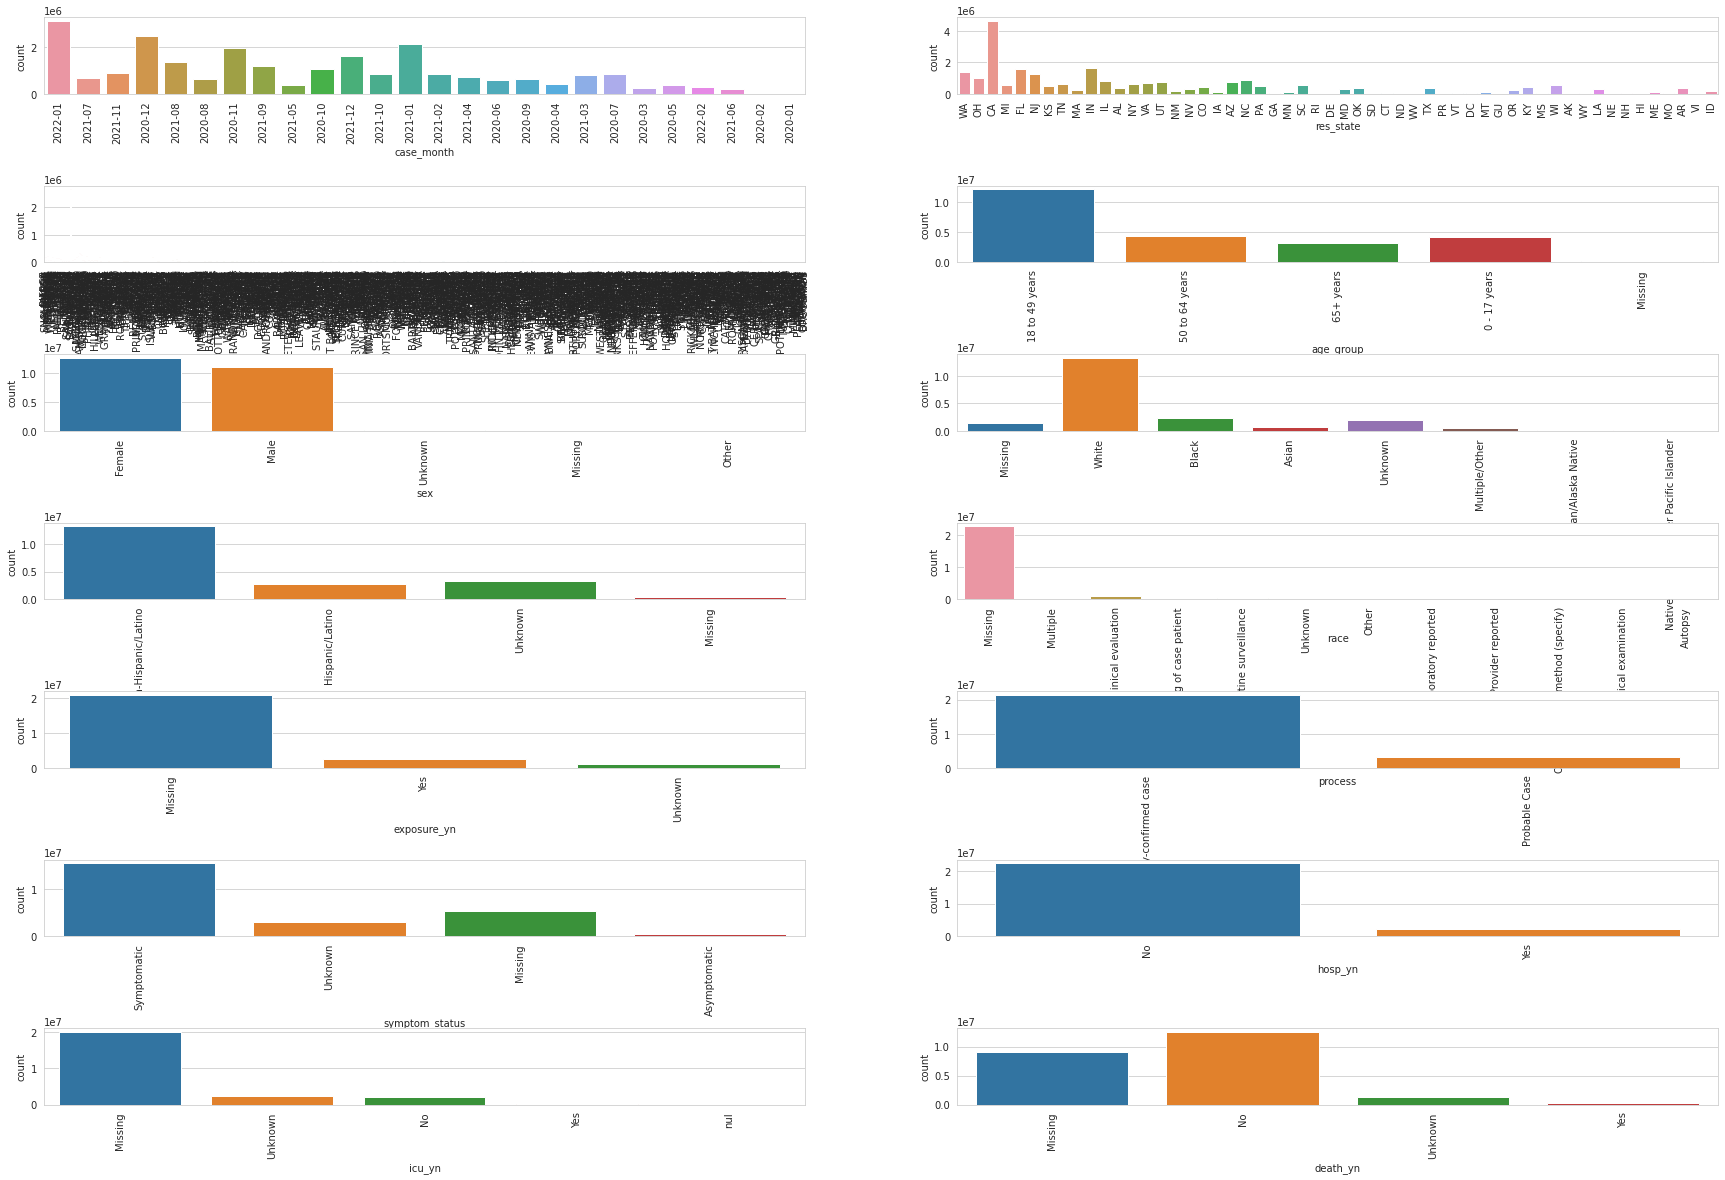

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(30, 20))
plt.subplots_adjust(hspace = 1.2)
for variable, subplot in zip(cats, ax.flatten()):
    sns.countplot(df_hosp[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

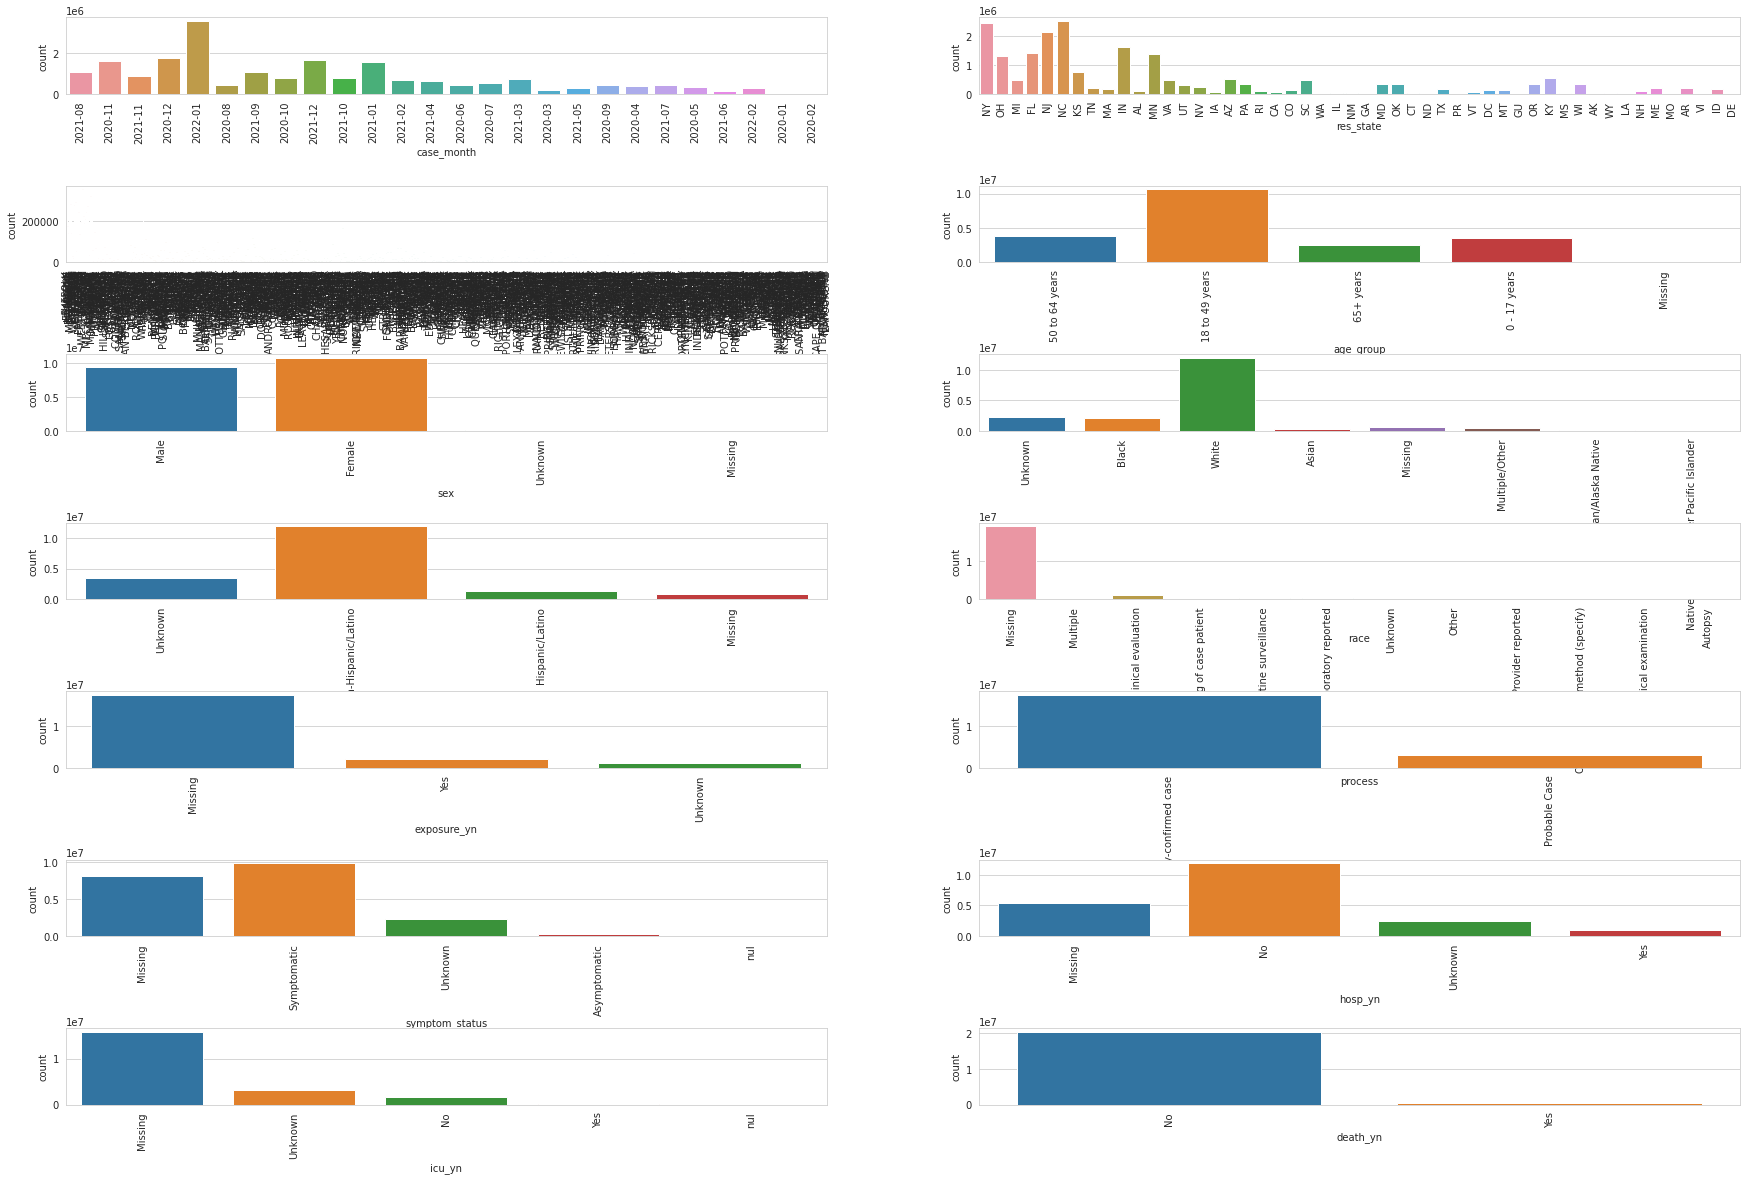

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(30, 20))
plt.subplots_adjust(hspace = 1.2)
for variable, subplot in zip(cats, ax.flatten()):
    sns.countplot(df_death[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
df_icu.to_csv('/content/drive/MyDrive/CSE6242/df_icu.csv')

In [ ]:
df_hosp.to_csv('/content/drive/MyDrive/CSE6242/df_hosp.csv')

In [ ]:
df_death.to_csv('/content/drive/MyDrive/CSE6242/df_death.csv')

In [ ]:
dfvax = pd.read_csv("/content/COVID-19_Vaccinations_in_the_United_States_County.csv")

In [ ]:
dfvax.describe()

,MMWR_week,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,...,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
count,1.483393e+06,1.483393e+06,1.441088e+06,1.483393e+06,2.999660e+05,299966.000000,1.388307e+06,1.465036e+06,1.406465e+06,1.483393e+06,...,1.248248e+06,291536.000000,1.233021e+06,1.248459e+06,1.247742e+06,1.455892e+06,2.963100e+05,1.455510e+06,1.455892e+06,2.093650e+05
mean,2.441679e+01,7.825606e+01,4.764969e+04,3.314920e+01,7.461214e+04,56.652933,4.812017e+04,3.733385e+01,4.504241e+04,3.911333e+01,...,4.674187e+00,5.806590,5.004122e+00,5.132869e+00,5.454358e+00,1.029493e+05,9.683720e+04,8.794572e+04,8.008276e+04,1.699906e+04
std,1.659766e+01,3.379986e+01,1.969186e+05,2.410281e+01,2.650608e+05,21.249562,1.971146e+05,2.788936e+01,1.832037e+05,2.860088e+01,...,2.145253e+00,1.945965,2.233958e+00,2.260567e+00,2.215757e+00,3.295063e+05,3.094141e+05,2.808176e+05,2.560861e+05,4.857234e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01,2.300000e+01
25%,8.000000e+00,8.310000e+01,1.723000e+03,9.100000e+00,5.267000e+03,48.000000,1.721000e+03,7.400000e+00,1.684000e+03,8.300000e+00,...,3.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,1.113100e+04,1.048300e+04,9.597000e+03,8.781000e+03,2.239000e+03
50%,2.300000e+01,9.450000e+01,7.230000e+03,3.610000e+01,1.409950e+04,57.900000,7.337000e+03,4.130000e+01,7.028000e+03,4.420000e+01,...,5.000000e+00,6.000000,5.000000e+00,5.000000e+00,6.000000e+00,2.610800e+04,2.461700e+04,2.235500e+04,2.037400e+04,5.063000e+03
75%,3.900000e+01,9.750000e+01,2.392200e+04,5.120000e+01,4.159350e+04,68.700000,2.422000e+04,5.930000e+01,2.296000e+04,6.190000e+01,...,6.000000e+00,8.000000,7.000000e+00,7.000000e+00,8.000000e+00,6.721500e+04,6.349900e+04,5.744800e+04,5.236100e+04,1.278000e+04
max,5.300000e+01,1.000000e+02,8.071750e+06,1.000000e+02,8.070054e+06,99.900000,7.777000e+06,1.000000e+02,7.137291e+06,1.000000e+02,...,8.000000e+00,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,1.003911e+07,9.459251e+06,8.619513e+06,7.894557e+06,1.413753e+06


In [ ]:
vaxcats = [col for col in dfvax.columns if dfvax[col].dtypes == "O"]
print(vaxcats)

['Date', 'FIPS', 'Recip_County', 'Recip_State', 'SVI_CTGY', 'Metro_status']


In [ ]:
dfvax['month_year'] = pd.to_datetime(dfvax['Date']).dt.to_period('M')
vaxcats = [col for col in dfvax.columns if dfvax[col].dtypes == "O"]
vaxcats.remove('Date')
vaxcats.append('month_year')
print(vaxcats)
dfvax.head()

['FIPS', 'Recip_County', 'Recip_State', 'SVI_CTGY', 'Metro_status', 'month_year']


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,month_year
0,03/09/2022,42033,10,Clearfield County,PA,94.7,44175.0,55.7,44173.0,58.5,...,8.0,8.0,8.0,8.0,79255.0,75553.0,70103.0,64899.0,16614.0,2022-03
1,03/09/2022,44001,10,Bristol County,RI,89.7,42723.0,88.1,42712.0,91.8,...,4.0,4.0,4.0,4.0,48479.0,46506.0,43057.0,39441.0,9795.0,2022-03
2,03/09/2022,34015,10,Gloucester County,NJ,93.9,218202.0,74.8,218190.0,78.9,...,4.0,4.0,4.0,4.0,291636.0,276411.0,251839.0,228537.0,47572.0,2022-03
3,03/09/2022,21027,10,Breckinridge County,KY,94.0,11622.0,56.8,11621.0,60.5,...,8.0,8.0,8.0,8.0,20477.0,19224.0,17509.0,15872.0,4047.0,2022-03
4,03/09/2022,39103,10,Medina County,OH,98.6,119947.0,66.7,119944.0,70.4,...,4.0,4.0,4.0,4.0,179746.0,170343.0,155086.0,140169.0,33188.0,2022-03


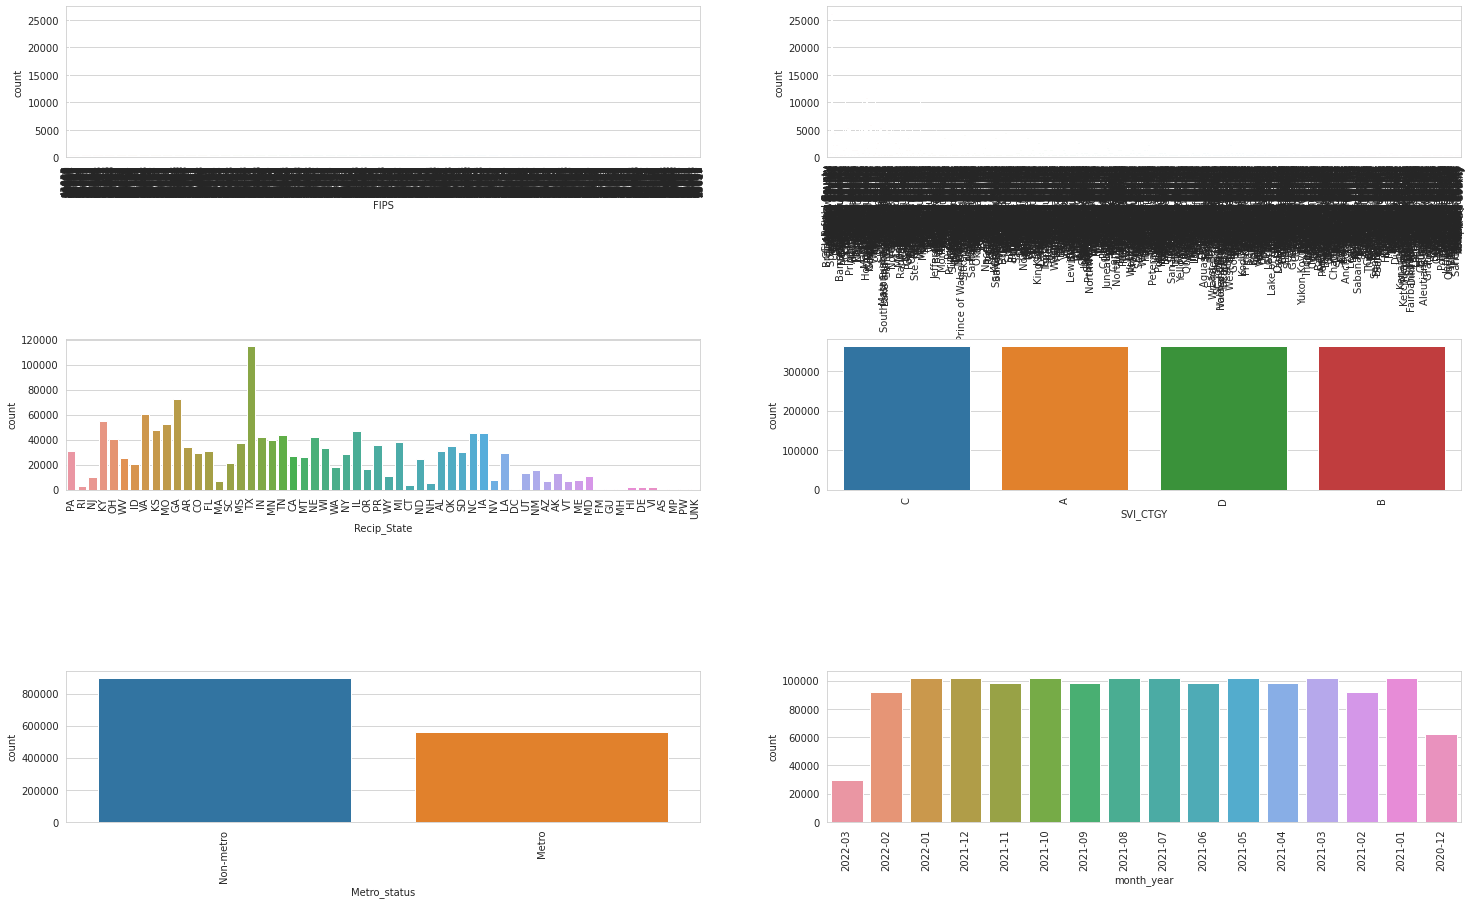

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(25, 15))
plt.subplots_adjust(hspace = 1.2)
for variable, subplot in zip(vaxcats, ax.flatten()):
    sns.countplot(dfvax[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
for vaxcat in vaxcats:
    x = dfvax.groupby([vaxcat]).size().reset_index(name='counts')
    print(x)

       FIPS  counts
0     01001     452
1     01003     452
2     01005     452
3     01007     452
4     01009     452
...     ...     ...
3220  72153     452
3221  78010     452
3222  78020     452
3223  78030     452
3224    UNK   26145

[3225 rows x 2 columns]
                   Recip_County  counts
0              Abbeville County     452
1                 Acadia Parish     452
2               Accomack County     452
3                    Ada County     452
4                  Adair County    1808
...                         ...     ...
1955  Yukon-Koyukuk Census Area     452
1956                Yuma County     904
1957              Zapata County     452
1958              Zavala County     452
1959             Ziebach County     452

[1960 rows x 2 columns]
   Recip_State  counts
0           AK   13556
1           AL   30732
2           AR   34349
3           AS     443
4           AZ    7229
5           CA   26665
6           CO   29377
7           CT    4065
8           DC     900
